# Decompacting stratigraphic layers

In this example we visualize the decompaction of stratigraphic layers at a shallow continental drill site location, and overlay tectonic subsidence to compare its subsidence contribution with that of sedimentation.

The drill site has recorded paleo-water depths which we backstrip to reveal tectonic subsidence, at the same time decompacting the sediment layers.


## Reference

The following paper covers the theory and algorithms of pyBacktrack:

* Müller, R. D., Cannon, J., Williams, S. and Dutkiewicz, A., 2018,
  PyBacktrack 1.0: A Tool for Reconstructing Paleobathymetry on Oceanic and Continental Crust,
  **Geochemistry, Geophysics, Geosystems,** 19, 1898-1909, doi: [10.1029/2017GC007313](https://doi.org/10.1029/2017GC007313)

## Calculate decompacted stratigraphic layers and tectonic subsidence

Here we use the [pybacktrack.backstrip_well](https://pybacktrack.readthedocs.io/en/latest/pybacktrack_reference.html#pybacktrack.backstrip_well) function to find the tectonic subsidence for each age in the well site and the decompacted sediment thicknesses. It returns a list of [pybacktrack.DecompactedWell](https://pybacktrack.readthedocs.io/en/latest/pybacktrack_reference.html#pybacktrack.DecompactedWell) and from each one we can extract an age, a tectonic subsidence and the decompacted depths of the stratigraphic layers.

In [1]:
import pybacktrack

#
# Each drill site file specifies then depths, ages and lithologies of its stratigraphic layers.
#
# A shallow continental drill site file used with backstripping.
backstrip_well_filename = '../test_data/sunrise_lithology.txt'

# Backstrip to find the tectonic subsidence for each age in the well site.
well, decompacted_wells = pybacktrack.backstrip_well(
    backstrip_well_filename,
    pybacktrack.BUNDLE_LITHOLOGY_FILENAMES)

# 'decompacted_wells' is a list of pybacktrack.DecompactedWell.
# Extract the age, water depth, tectonic subsidence and
# decompacted depths of each stratigraphic layer in the well.
ages = []
water_depths = []
tectonic_subsidences = []

# The total number of stratigraphic layers at present day.
num_stratigraphic_units = len(well.stratigraphic_units)
# Each stratigraphic layer will have its own depth vs age curve.
# Start with an empty list for each layer.
all_stratigraphic_unit_depths = [[] for i in range(num_stratigraphic_units)]

# Each successive decompacted well involves stripping off a stratigraphic layer.
for decompacted_well in decompacted_wells:
    # Keep track of the ages of the top of each stratigraphic layer.
    age = decompacted_well.get_age()
    ages.append(age)
    
    # Keep track of the water depth at each age.
    water_depth = decompacted_well.get_water_depth()
    water_depths.append(water_depth)

    # Keep track of the tectonic subsidence at each age.
    tectonic_subsidence = decompacted_well.get_tectonic_subsidence()
    tectonic_subsidences.append(tectonic_subsidence)
    
    # The number of decompacted stratigraphic layers decreases by one each loop iteration.
    num_decompacted_stratigraphic_units = len(decompacted_well.decompacted_stratigraphic_units)
    
    # Iterate over the stratigraphic layers that have already been removed.
    # We'll just give them the current water depth so we can easily fill colours between curves below.
    stratigraphic_unit_index = 0
    while stratigraphic_unit_index < num_stratigraphic_units - num_decompacted_stratigraphic_units:
        all_stratigraphic_unit_depths[stratigraphic_unit_index].append(water_depth)
        stratigraphic_unit_index += 1
    
    # The depth of the current surface layer starts at the water depth.
    total_decompacted_depth = water_depth
    
    # Iterate over the stratigraphic layers still existing at the current time.
    # Each layer has a decompacted thickness which adds to the decompacted depth.
    for decompacted_stratigraphic_unit in decompacted_well.decompacted_stratigraphic_units:
        total_decompacted_depth += decompacted_stratigraphic_unit.decompacted_thickness
        all_stratigraphic_unit_depths[stratigraphic_unit_index].append(total_decompacted_depth)
        stratigraphic_unit_index += 1

c:\users\john\development\usyd\source_code\repositories\earthbyte\pybacktrack\pybacktrack\backstrip.py:228: UserWarning: Well thickness 2311.0 is larger than the total sediment thickness grid 1298.14919924 at well location (128.1538, -9.5901).
  well_sediment_thickness, total_sediment_thickness, well.longitude, well.latitude))


## Plot decompacted stratigraphic layers and tectonic subsidence

Next we plot a "depth vs age" curve for each stratigraphic layer in the drill site. We also plot the tectonic subsidence.

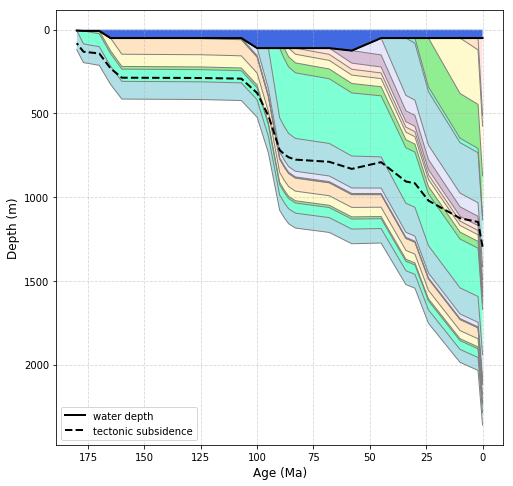

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt

# Choose a colour for each stratigraphic unit.
stratigraphic_unit_colours = [
    'mistyrose', 'bisque', 'lemonchiffon', 'lightgreen', 'aquamarine', 'powderblue', 'lavender', 'thistle']

fig = plt.figure(figsize=(8,8))

for stratigraphic_unit_index in range(num_stratigraphic_units):
    # Plot a grey line at the top of the current stratigraphic unit.
    plt.plot(
        ages,
        all_stratigraphic_unit_depths[stratigraphic_unit_index],
        color='grey',
        linewidth=1.0)
    # Fill the current stratigraphic layer with a colour.
    plt.fill_between(
        ages,
        (all_stratigraphic_unit_depths[stratigraphic_unit_index-1]
             if stratigraphic_unit_index > 0
             else water_depths),
        all_stratigraphic_unit_depths[stratigraphic_unit_index],
        facecolor=stratigraphic_unit_colours[stratigraphic_unit_index % len(stratigraphic_unit_colours)])

# Fill blue down to water depth.
plt.fill_between(
    ages,
    [0.0] * len(water_depths),
    water_depths,
    facecolor='royalblue')

# Plot water depth.
plt.plot(
    ages,
    water_depths,
    color='black',
    label='water depth',
    linestyle='-',
    linewidth=2.0)

# Plot tectonic subsidence.
plt.plot(
    ages,
    tectonic_subsidences,
    color='black',
    label='tectonic subsidence',
    linestyle='--',
    linewidth=2.0)

plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

plt.ylabel('Depth (m)', fontsize=12)
plt.xlabel('Age (Ma)', fontsize=12)
plt.grid(linestyle='--',alpha=0.5)

plt.legend(fontsize=10)

plt.show()